# Build and train a neural network

In [1]:
%cd ../

/home/lln/Documentos/recreate_pytorch/PyNorch


In [9]:
import norch
import norch.nn as nn
import norch.optim as optim
from norch.utils.data.dataloader import Dataloader
from norch.norchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(1)

## Visualizing data

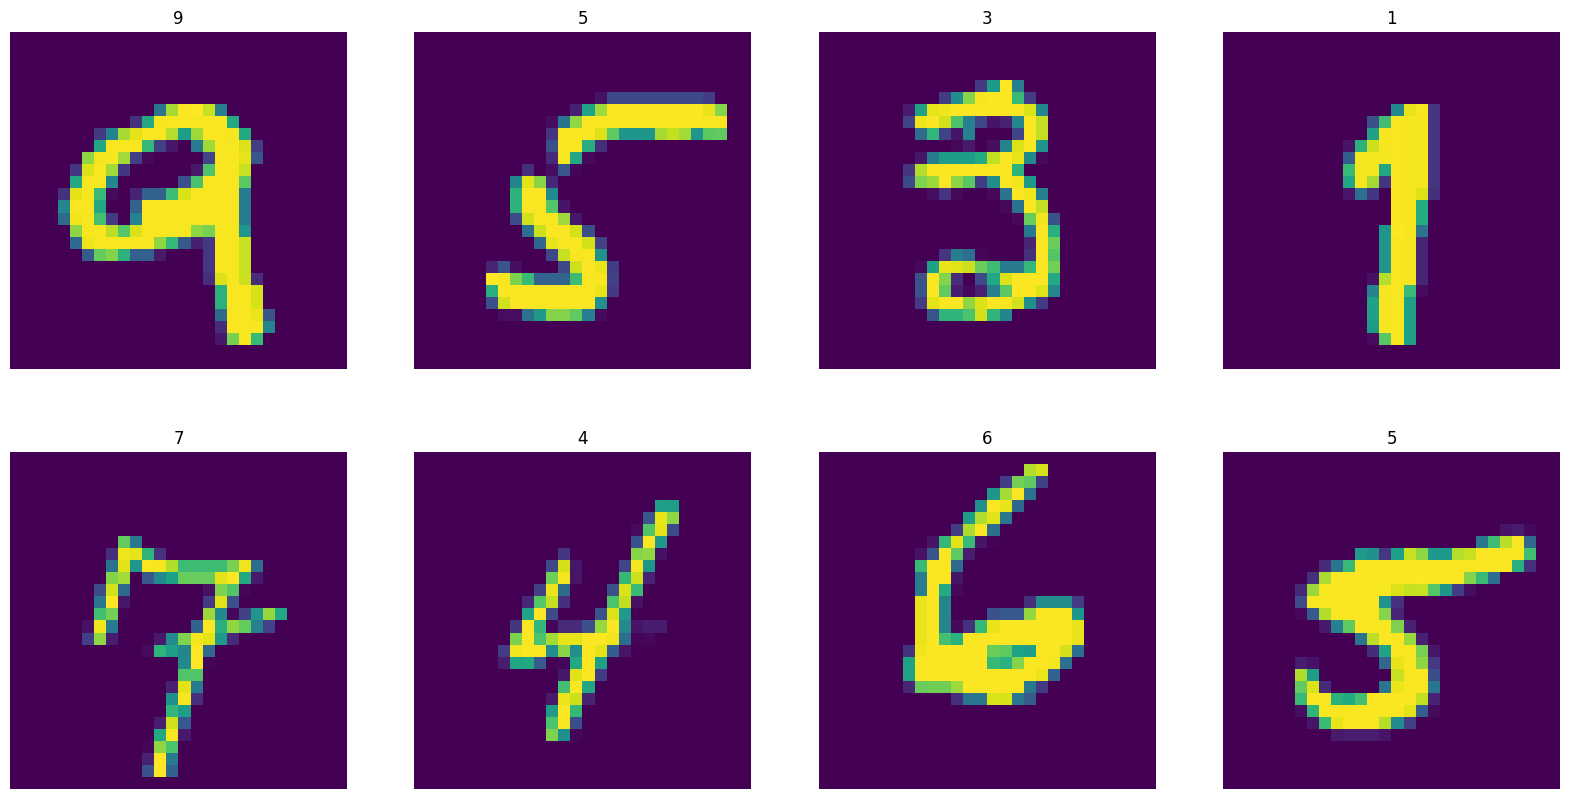

In [12]:
train_data, test_data = norch.norchvision.datasets.MNIST.splits()
input_sample, target_sample = train_data[0]

fig = plt.figure(figsize = (20, 10))
columns = 4
rows = 2

for i in range(1, columns * rows + 1):
    # Choose a random image
    image_index = random.randint(0, len(train_data))
    image, label = train_data[image_index]

    fig.add_subplot(rows, columns, i)
    plt.imshow(np.array(image).reshape(28, 28))
    plt.title(label)
    plt.axis('off')
    
plt.show()

## Training 

In [ ]:
BATCH_SIZE = 32
device = "cuda" #cpu
epochs = 10

transform = transforms.Sequential(
    [
        transforms.ToTensor(),
        transforms.Reshape([-1, 784, 1])
    ]
)

target_transform = transforms.Sequential(
    [
        transforms.ToTensor()
    ]
)

train_data, test_data = norch.norchvision.datasets.MNIST.splits(transform=transform, target_transform=target_transform)
train_loader = Dataloader(train_data, batch_size = BATCH_SIZE)

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 30)
        self.sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(30, 10)
        self.sigmoid2 = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid1(out)
        out = self.fc2(out)
        out = self.sigmoid2(out)
        
        return out

model = MyModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_list = []

for epoch in range(epochs):    
    for idx, batch in enumerate(train_loader):

        inputs, target = batch

        inputs = inputs.to(device)
        target = target.to(device)

        outputs = model(inputs)
        
        loss = criterion(outputs, target)
        
        optimizer.zero_grad()
        
        loss.backward()

        optimizer.step()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss[0]:.4f}')
    loss_list.append(loss[0])

In [14]:
model

MyModel(
   (fc1): Linear(input_dim=784, output_dim=30, bias=True)
   (sigmoid1): Sigmoid()
   (fc2): Linear(input_dim=30, output_dim=10, bias=True)
   (sigmoid2): Sigmoid()
)

## Check loss

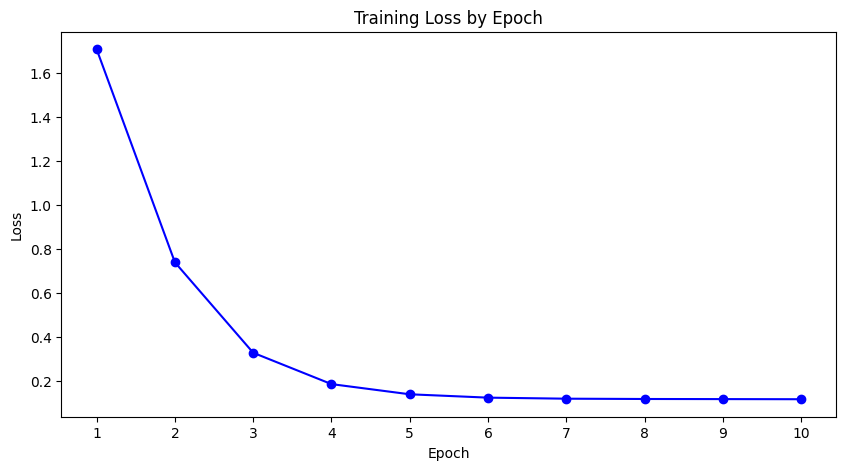

In [5]:
import matplotlib.pyplot as plt

epochs_list = range(1, len(loss_list) + 1)

plt.figure(figsize=(10, 5))

plt.plot(epochs_list, loss_list, 'b', marker='o')
plt.title('Training Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs_list)
plt.show()